#### Import library python

In [1]:
# import 
import datetime,os

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

import IPython
import IPython.display
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from math import sqrt
from numpy import concatenate
import numpy as np
import math

import pandas as pd
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# import tensorflow 
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers import BatchNormalization

# Load the TensorBoard notebook extension.
%load_ext tensorboard


# import platform
# print(platform.python_version())
# print(np.__version__)
# print(tf.__version__)

# tf.config.list_physical_devices('GPU')

#### Database

In [2]:
# File name and Path
cwd = os.getcwd()
path_adress = "/Import_Dataset/"

# ข้อมูล พิกัดสถานที่เเละรายชื้ออ้างอิงสถานที่ตรวจวัด
file_name_st = 'Data_lat_long_Rice research Center'
csv_file_st = cwd + path_adress + file_name_st + '.csv'

df_st = pd.read_csv(csv_file_st)
print("All low RiceCenter {} station" .format(df_st.shape[0]))

data_list_st_num = list(range(0, len(df_st)))
data_list_st_name = []
data_list_st_name = df_st['nameEng'].values.tolist()
data_list_st_lat = df_st['Latitude'].values.tolist()
data_list_st_long = df_st['Longitude'].values.tolist()

#################-- Moving Averag data --#################
def mavr_dataset(frames_sma,rolling_num,our_rate,mode):    
    h_name = list(frames_sma)
    if mode == 'sum':
        frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).sum().round(1)
        frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).sum().round(1)
        frames_sma['precip'] = frames_sma['precip'].rolling(rolling_num, min_periods=1).sum().round(1)
    else:
        frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).mean().round(1)
        frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).mean().round(1)
        frames_sma['precip'] = frames_sma['precip'].rolling(rolling_num, min_periods=1).mean().round(1)
   
    for i in range(7,12):
        frames_sma[h_name[i]] = frames_sma[h_name[i]].rolling(rolling_num, min_periods=1).mean().round(1)

    constant_subset = frames_sma[::our_rate] 
    return constant_subset

#################-- creat_dataset  --#################
def creat_dataset(st_BPH = 'ALL', y_1='2015', y_2='2019', m_avr='ALL'):
    for i in range(len(data_list_st_num)):
        st = i
        file_name = df_st['nameEng'][data_list_st_num[st]]
        name_input = file_name
        name_locals = 'stN_' + file_name

        # File name and Path
        csv_file = cwd + path_adress + name_input + '.csv'
        # index_col=0 , index_col=None
        dataset = pd.read_csv(csv_file, header=0,
                              index_col=0, encoding="TIS-620")

        if m_avr == '3-DAY-All-':
            locals()[name_locals] = mavr_dataset(dataset,3,1,'mean')
        elif m_avr == '7-DAY-All':
            locals()[name_locals] = mavr_dataset(dataset,7,1,'mean')
        elif m_avr == '14-DAY-All':
            locals()[name_locals] = mavr_dataset(dataset,14,1,'mean')
        elif m_avr == '3-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,3,3,'sum')
        elif m_avr == '7-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,7,7,'sum')
        elif m_avr == '14-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,14,14,'sum')
        else :
            locals()[name_locals] = dataset
            # print(f'Dataframe name_station: {st+1 , name_input}')
        print('wait......')
        del dataset
        clear_output(wait=True)

    date_start = y_1 + '-01' + '-01'
    date_stop = y_2 + '-12' + '-31'

#---------------------------------------------------------------------------------------------------------------------------------------------------#
    if st_BPH != 'ALL' :
        # file_name = df_st['nameEng'][data_list_st_num[st_BPH]]
        file_name = st_BPH
        locals_input = 'stN_' + file_name
        print(locals_input)
        dataset_st = locals()[locals_input].loc[date_start:date_stop]
        frames_st = dataset_st
    else:
        m = 0
        for j in range(len(data_list_st_num)):
            # for j in range(df_st.shape[0]):
            # file_name = df_st['nameEng'][j]
            file_name = df_st['nameEng'][data_list_st_num[j]]
            locals_input = 'stN_' + file_name
            print(locals_input)
            dataset_st = locals()[locals_input].loc[date_start:date_stop]
            clear_output(wait=True)
            if m == 0:
                frames_st = dataset_st
                m = m+1
                print(m)
            else:
                frames_st = [frames_st, dataset_st]
                frames_st = pd.concat(frames_st)

    # dataset    
    frames = frames_st
    return frames
#---------------------------------------------------------------------------------------------------------------------------------------------------#

#################-- Drop Colum  --#################
def drop_col(df_drop,drop = ['address']):
    for j in range(len(drop)):
        df_drop = df_drop.drop(drop[j], axis=1)
    return df_drop

#################--      Plot        --#################
def plot_data(frames_train,plot_cols,df_name,start='2015',end='2017',st = 'ALL'):
    #ตรวจสอบข้อมูล dataset 
    if st == 'ALL':
        df_plot = frames_train[plot_cols]
    else:
        df_plot = frames_train[plot_cols].loc[start:end]
    
    plt.figure()    
    # df_plot.plot(lw=1,grid=True,figsize=(13,30),subplots=True)
    # df_plot.plot(lw=1,grid=True,subplots=True)
    # df_plot.plot(marker='.',grid=True,linestyle = 'solid',subplots=True)
    df_plot.plot(marker='.',grid=True,linestyle = 'solid')
    plt.xlabel('Date time-'+ df_name)
    plt.legend()
    # plt.show()   

#################--   get list of folders in directory   --#################
dir_path = cwd + "/Export_lstm/model/"
def get_list_folder():
    folder_list = os.listdir(dir_path)
    return folder_list

def get_file_model(file_name):
    txt = dir_path+file_name+"/Training_model_data_discription.txt"
    string_data = open(txt,"r").read()
    list_txt = list(string_data.split("\n"))
    return list_txt
    
  #################-- convert series to supervised learning --#################
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#################--          data_preprocess        --#################
def data_preprocess(data_frames,n_day,n_out):
      values_df = data_frames.values    #ตัด header กับ idx ออก เป็น array matrix
      n_features = data_frames.shape[1]
      # print(n_features)
      
      # ensure all data is float
      values = values_df.astype('float32')
      # normalize features
      scaler = MinMaxScaler(feature_range=(0, 1))
      scaled = scaler.fit_transform(values)

      # frame as supervised learning
      reframed = series_to_supervised(scaled, n_day, n_out)
      # print(reframed.shape)
      # print(reframed.head())

      # datasets
      values = reframed.values

      #input 
      n_obs = n_day * n_features
      dataset_X, dataset_y = values[:, :n_obs], values[:, -1]
      # print(dataset_X.shape, len(dataset_X), dataset_y.shape) 

      # reshape input to be 3D [samples, timesteps, features]
      dataset_X = dataset_X.reshape((dataset_X.shape[0], n_day, n_features))
      # print(dataset_X.shape, dataset_y.shape)

      return dataset_X,dataset_y

All low RiceCenter 34 station


#### LSTM model

In [3]:
      
#################--           create_model           --#################
def create_model(units,shape_1,shape_2,activation = 'relu'):
      return tf.keras.models.Sequential([
                  # Shape [batch, time, features] => [batch, time, lstm_units]
                  keras.layers.LSTM(units=units, input_shape=(shape_1, shape_2),activation=activation),
                  # keras.BatchNormalization(),
                  keras.layers.Dense(units=1)
            ])            
 
#################--           train_model           --################# 

# Save checkpoints during training
checkpoint_path = "./Export_lstm/" + "last_checkpoints/" +'lstm_ckpt'+'/'+"cp-{epoch:04d}.ckpt"
checkpoint_dir_new = os.path.dirname(checkpoint_path)
# print(checkpoint_dir_new)

def train_model(model,train_x, train_y,val_x, val_y,Epochs,batch_size,optimizer = 0.0001,loss_input = 'mae',metrics_input = 'accuracy'):
      print("train_model......")
      Optimizer = tf.keras.optimizers.Adam(optimizer)
      model.compile(Optimizer, loss=loss_input, metrics= metrics_input)

      time_save = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
      logdir = os.path.join("logs", time_save)
      tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

      # Create a callback that saves the model's weights every 5 epochs
      cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_weights_only=True,save_freq="epoch",period=100)
      
      training_history =  model.fit(train_x, train_y, 
                  epochs=Epochs, 
                  batch_size=batch_size, 
                  validation_data=(val_x, val_y), 
                  verbose=1, 
                  # callbacks=[cp_callback,es_callback], 
                  # callbacks=[cp_callback],
                  callbacks=[tensorboard_callback,cp_callback])
                  # shuffle=False)
      return training_history,model,time_save

#################--           open TensorBoard          --#################   
def displaytensor():
      %tensorboard --logdir logs --port=6006
      # from tensorboard import notebook
      # notebook.list() # View open TensorBoard instances
      # notebook.display(port=6006, height=1000) 
      import webbrowser
      # generate an URL
      url = 'http://localhost:6006/'
      webbrowser.open(url)
      
# Function to convert  
def listToString(s): 
    # initialize an empty string
    str = " "     
    # return string  
    return (str.join(s))

def StringTolist(string):
    li = list(string.split(" "))
    return li
    
#################--           Save model          --#################  
def save_model(model_save,name_model = "sut_rice_model_1"):
      print('save')
      ## Set Name and Time ## Make folder
      # Export_folder_name = "./Export_lstm/model/"
      Export_folder_name = "./Export_lstm/model/"
       
      newfolder_name = time_out+"_"+name_model
      path_newfolder = Export_folder_name
      path_newfolder_save = os.path.join(path_newfolder, newfolder_name)
      try: 
            os.mkdir(path_newfolder_save) 
      except OSError as error: 
            print(error)  

      print("Directory '% s' created" % path_newfolder_save)
      Export_folder_name = path_newfolder_save + '/'

      ## Save model
      model_name = "model_lstm"
      model_file = Export_folder_name + model_name
      model_save.save(model_file)

      # save history
      history_name = "hist_lstm.npy"
      history_file = Export_folder_name + history_name
      np.save(history_file,history_out.history)
      
      ## save discription training data
      txt_name = 'Training_model_data_discription.txt'
      filepath_save_txt = Export_folder_name + txt_name
      f = open(filepath_save_txt, "a")

      f.write('Model:'+name_model)
      f.write('\n')
      lines_2 = ['station:',dropdown_name_st.value]
      f.write(''.join(lines_2))
      f.write('\n')
      lines_3 = ['Year-train:',dropdown_year_train1.value+'-'+dropdown_year_train2.value]
      f.write(''.join(lines_3))
      f.write('\n')
      lines_4 = ['Year-val:',dropdown_year_val1.value+'-'+dropdown_year_val2.value]
      f.write(''.join(lines_4))
      f.write('\n')
      lines_5 = ['features-num:',str(len(selected_data))]
      f.write(''.join(lines_5))
      f.write('\n')
      lines_6 = ['features-drop:',listToString(selected_data)]
      f.write(''.join(lines_6))
      f.write('\n')
      lines_7 = ['Sampling:',dropdown_sampling_data.value]
      f.write(''.join(lines_7))
      f.write('\n')
      lines_8 = ['time-lag:',str(Box_nday.value)]  
      f.write(''.join(lines_8))
      f.write('\n')
      lines_9 = ['time-forecast:',str(Box_nout.value)]
      f.write(''.join(lines_9))
      f.write('\n')
      lines_10 = ['data-Model:','Epochs:',str(Slider_Epochs.value),'batch_size:',str(Slider_batch_size.value),'Units:',str(Box_Units.value),'activation:',dropdown_activation.value,'loss:',dropdown_loss.value]  
      f.write(''.join(lines_10))
      f.write('\n')
      lines_11 = ['performance:','loss:', str(round(history_out.history['loss'][-1],5)),'accuracy:', str(round(history_out.history['accuracy'][-1],5)),'val-loss:', str(round(history_out.history['val_loss'][-1],5)),'val-accuracy:', str(round(history_out.history['val_accuracy'][-1],5))]  
      f.write(''.join(lines_11))
      f.close()

#################--           forecast_model          --#################  
def forecast_model(df_predict,n_day,n_out):
      values_df = df_predict.values    #ตัด header กับ idx ออก เป็น array matrix
      n_features = df_predict.shape[1]
      # print(n_features)

      # ensure all data is float
      values = values_df.astype('float32')
      # normalize features
      scaler = MinMaxScaler(feature_range=(0, 1))
      scaled = scaler.fit_transform(values)

      # frame as supervised learning
      reframed = series_to_supervised(scaled, n_day, n_out)
      # print(reframed.shape)
      # print(reframed.head())

      # datasets
      values = reframed.values

      #input 
      n_obs = n_day * n_features
      dataset_X, dataset_y = values[:, :n_obs], values[:, -1]
      # print(dataset_X.shape, len(dataset_X), dataset_y.shape) 

      # reshape input to be 3D [samples, timesteps, features]
      dataset_X = dataset_X.reshape((dataset_X.shape[0], n_day, n_features))
      # print(dataset_X.shape, dataset_y.shape)



      # # make a prediction
      yhat = model_loaded.predict(dataset_X)
      test_X_reshape = dataset_X.reshape((dataset_X.shape[0], n_day*n_features))
      
      # invert scaling for forecast
      # inv_yhat = concatenate((yhat, test_X[:, -29:]), axis=1)
      inv_yhat = concatenate((test_X_reshape[:, :(n_features-1)], yhat), axis=1)
      inv_yhat = scaler.inverse_transform(inv_yhat)
      inv_yhat = inv_yhat[:,-1]

      # invert scaling for actual
      test_y_reshape = dataset_y.reshape((len(dataset_y), 1))
      # inv_y = concatenate((test_y, test_X[:, -29:]), axis=1)
      inv_y = concatenate((test_X_reshape[:, :(n_features-1)], test_y_reshape), axis=1)
      inv_y = scaler.inverse_transform(inv_y)
      inv_y = inv_y[:,-1]
      # # calculate RMSE
      # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
      # print('Test RMSE: %.3f' % rmse)

      forecast_data = (abs(inv_yhat[:])) 
      label_data =  inv_y[:]

      # calculate RMSE
      rmse = sqrt(mean_squared_error(label_data,forecast_data))

      print('Test RMSE: %.3f' % rmse)

      # df = frames_test.loc[date_start:date_stop].reset_index()
      df = frames_predict.reset_index()
      date_time_predict = pd.to_datetime(df.pop('date'))

      from matplotlib import pyplot as plt
      def plot_Perfor():
            plt.figure()
            plt.plot(date_time_predict[n_day+n_out-1:],label_data,label='label',marker='.')
            plt.plot(date_time_predict[n_day+n_out-1:],forecast_data,label='forecast',marker='.')

            plt.ylabel('BPH volume')
            plt.xlabel('Date time')
            # plt.title(file_name +'  RMSE: %.3f' % rmse)
            plt.legend()
            plt.grid(True)
            # plt.show()

      plot_Perfor()

#### Dashboard

In [4]:
#########################################-- Dashboard Input Data--#########################################
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#################-- DataFrame station --#################
output_df_st = widgets.Output()
def dropdown_station_eventhandler(change):
    output_df_st.clear_output()
    with output_df_st:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- DataFrame station --#################
output_df_st_predict = widgets.Output()
def dropdown_station_predict_eventhandler(change):
    output_df_st_predict.clear_output()
    with output_df_st_predict:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- load data  --#################


output_df_train = widgets.Output()
output_df_val = widgets.Output()
output_df_test = widgets.Output()
output_df_col = widgets.Output()
def clicked_load(b):
    global df_out_train
    global df_out_val
    global df_out_test
    global selected_data 
    output_df_train.clear_output()
    output_df_val.clear_output()
    output_df_test.clear_output()
    output_df_col.clear_output()
    with output_df_train:
        df_out_train = creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value)
        display(df_out_train)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value))
    with output_df_val:
        df_out_val = creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value)
        display(df_out_val)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value))
    with output_df_test:
        df_out_test = creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value)
        display(df_out_test)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value))
    with output_df_col:
        checkbox_objects = []
        # global selected_data
        data = sorted(set(chek_list(df_out_train)),reverse=True)     
        names = []
        for key in data:
                checkbox_objects.append(widgets.Checkbox(value=True, description=key))
                names.append(key)
 
        arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}
        ui = widgets.HBox(children=checkbox_objects)
        display(ui)
             
        selected_data = []
        def select_data(**kwargs):
            selected_data.clear()
            for key in kwargs:
                if kwargs[key] is True:
                    selected_data.append(key)
            print(selected_data)

        widgets.interactive_output(select_data, arg_dict)
    
 
#################-- Export data  --#################
df_train = widgets.Output()
df_val = widgets.Output()
df_test = widgets.Output()
def clicked_export(b):
    df_train.clear_output()
    df_val.clear_output()
    df_test.clear_output()
    global frames_train
    global frames_val
    global frames_test
    with df_train:
        frames_train = drop_col(df_out_train,selected_data) 
        display(frames_train)
    with df_val:
        frames_val = drop_col(df_out_val,selected_data) 
        display(frames_val)  
    with df_test:
        frames_test = drop_col(df_out_test,selected_data) 
        display(frames_test)  

def chek_list(df_ch):
        data_col = set(df_ch.columns)
        return data_col      

#################----------------------------- DashBoard display ----------------------------------#################
dropdown_name_st = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_st.nameEng),description='station :')
dropdown_sampling_data = widgets.Dropdown(options = ['All','3-DAY-All','7-DAY-All','14-DAY-All','3-DAY-Sampling','7-DAY-Sampling','14-DAY-Sampling'],valure = 'All-DAY',description='Sampling :')
dropdown_year_train1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],description='Year-train :')
dropdown_year_train2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2017')
dropdown_year_val1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018',description='Year-val :')
dropdown_year_val2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018')
dropdown_year_test1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019',description='Year-test :')
dropdown_year_test2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019')


button_download = widgets.Button(description='load data',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_export = widgets.Button(description='export dataset',disabled=False,button_style='success',tooltip='Click me',icon='check')

button_download.on_click(clicked_load)
button_export.on_click(clicked_export)

dropdown_name_st.observe(dropdown_station_eventhandler, names='value')


item_layout = widgets.Layout(margin='0 0 15px 0')
input_widgets_row1 = widgets.HBox([dropdown_name_st,dropdown_year_train1,dropdown_year_train2,dropdown_year_val1,dropdown_year_val2,dropdown_year_test1,dropdown_year_test2],layout = item_layout)
input_widgets_row2 = widgets.HBox([dropdown_sampling_data,button_download,button_export],layout = item_layout)

tab_dataset = widgets.Tab([output_df_st,output_df_train,output_df_val,output_df_test,output_df_col,df_train,df_val,df_test])
tab_dataset.set_title(0, 'Dataset station')
tab_dataset.set_title(1, 'train-data')
tab_dataset.set_title(2, 'validation-data')
tab_dataset.set_title(3, 'test-data')
tab_dataset.set_title(4, 'Drop-data')
tab_dataset.set_title(5, 'Dataset-train')
tab_dataset.set_title(6, 'Dataset-validation')
tab_dataset.set_title(7, 'Dataset-test')
dashboard_dataset = widgets.VBox([input_widgets_row1,input_widgets_row2])
display(dashboard_dataset)
display(tab_dataset)


In [5]:
#########################################-- Dashboard train model--#########################################
#################-- select model --#################
# def Slider_Epochs_eventhandler(change):
#     return Slider_Epochs
# def Slider_batch_size_eventhandler(change):
#     return Slider_batch_size
# def Box_Units_eventhandler(change):
#     return Box_Units
# def Box_Optimizer_eventhandler(change):
#     return Box_Optimizer
# def dropdown_activation_eventhandler(change):
#     return dropdown_activation
# def dropdown_loss_eventhandler(change):
#     return dropdown_loss
# def Box_nday_eventhandler(change):
#     return Box_nday
# def Box_nout_eventhandler(change):
#     return Box_nout
# def string_name_save_eventhandler(change):
#     return string_name_save

# #################-- select predict --#################
# def dropdown_start_date_eventhandler(change):
#     return start_date
# def dropdown_end_date_eventhandler(change):
#     return end_date
def dropdown_file_eventhandler(change):
    dropdown_folder_list.options = get_list_folder()


#################-- create_model  --#################
output_create_model = widgets.Output()
def clicked_model(b):
    output_create_model.clear_output()
    global model_in
    global train_X
    global train_Y
    global val_X
    global val_Y
    
    
    with output_create_model:
        train_X, train_Y = data_preprocess(frames_train,Box_nday.value,Box_nout.value)
        val_X,val_Y = data_preprocess(frames_val,Box_nday.value,Box_nout.value)              
        model_in = create_model(Box_Units.value,train_X.shape[1],train_X.shape[2],dropdown_activation.value)
        clear_output(wait=True) 
        print(model_in.summary())
        print(train_X.shape)  
        print(train_Y.shape) 
        
#################-- fit_model  --#################
output_fit_model = widgets.Output()   
def clicked_train(b):
    output_fit_model.clear_output()
    global history_out,model_out,time_out
       
    with output_fit_model:
        # fit network
        # (train_x, train_y,val_x, val_y,Epochs,batch_size,optimi = 0.0001,loss_input = 'mae',metrics_input = 'accuracy'):
        history_out,model_out,time_out = train_model(model_in,train_X, train_Y,val_X, val_Y,Slider_Epochs.value,Slider_batch_size.value,
                                Box_Optimizer.value,dropdown_loss.value)
        print("Average test loss: ", np.average(history_out.history['loss']))
        
      
 #################-- tensorboard display  --#################
output_tensorboard = widgets.Output()      
def clicked_tensor(b):
    output_tensorboard.clear_output()
    with output_tensorboard:
         displaytensor()

#################--      save model     --#################
output_save_model = widgets.Output()   
def clicked_save(b):
    output_save_model.clear_output()
    
    with output_save_model:
        # fit network
        filename_model = string_name_save.value
        save_model(model_out, filename_model)
        print("save-model :%s" %(string_name_save.value))

button_download = widgets.Button(description='load data',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_export = widgets.Button(description='export dataset',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_model = widgets.Button(description='create_model',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_train = widgets.Button(description='train_model',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_tensorboard = widgets.Button(description='tensorboard',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_save = widgets.Button(description='save model',disabled=False,button_style='success',tooltip='Click me',icon='check')

Slider_Epochs = widgets.IntSlider(value=10,min=10,max=5000,step=10,description='Epochs :',disabled=False,continuous_update=False,orientation='horizontal', readout=True,readout_format='d')
Slider_batch_size = widgets.IntSlider(value=128,min=16,max=256,step=8,description='Batch_size :',disabled=False,continuous_update=False,orientation='horizontal', readout=True,readout_format='d')
Box_Units = widgets.IntText(value=50,description='units :',disabled=False)
Box_Optimizer = widgets.FloatText(value=0.0001,step=0.0001,description='Optimizer :',disabled=False)
dropdown_activation = widgets.Dropdown(options = ['relu','elu','sigmoid','tanh'],valure = 'elu',description='activation :')
dropdown_loss = widgets.Dropdown(options = ['mae','mae'],valure = 'mae',description='loss :')
Box_nday = widgets.IntText(value=7,description='n-day :',disabled=False)
Box_nout = widgets.IntText(value=1,description='n-out :',disabled=False)

start_date = widgets.DatePicker(description='Start Date',disabled=False)
end_date = widgets.DatePicker(description='End Date',disabled=False)
dropdown_folder_list = widgets.Dropdown(options = get_list_folder())

string_name_save = widgets.Text(value='sut_rice_model_0',placeholder='Type something',description='name model:',disabled=False)

button_model.on_click(clicked_model)
button_train.on_click(clicked_train)
button_tensorboard.on_click(clicked_tensor)
button_save.on_click(clicked_save)

# Slider_Epochs.observe(Slider_Epochs_eventhandler, names='value')
# Slider_batch_size.observe(Slider_batch_size_eventhandler, names='value')
# Box_Units.observe(Box_Units_eventhandler, names='value')
# Box_Optimizer.observe(Box_Optimizer_eventhandler, names='value')
# dropdown_activation.observe(dropdown_activation_eventhandler, names='value')
# dropdown_loss.observe(dropdown_loss_eventhandler, names='value')
# Box_nday.observe(Box_nday_eventhandler, names='value')
# Box_nout.observe(Box_nout_eventhandler, names='value')
# start_date.observe(dropdown_start_date_eventhandler, names='values')
# end_date.observe(dropdown_end_date_eventhandler, names='values')
dropdown_folder_list.observe(dropdown_file_eventhandler)
# string_name_save.observe(string_name_save_eventhandler, names='values')

input_widgets_Model_row1 = widgets.HBox([Slider_Epochs,Slider_batch_size,Box_Units,Box_Optimizer],layout = item_layout)
input_widgets_Model_row2 = widgets.HBox([dropdown_activation,dropdown_loss,Box_nday,Box_nout],layout = item_layout)
input_widgets_Model_row3 = widgets.HBox([button_model,button_train,button_tensorboard,string_name_save,button_save])

dashboard_model = widgets.VBox([input_widgets_Model_row1,input_widgets_Model_row2,input_widgets_Model_row3])
tab_model = widgets.Tab([output_create_model,output_fit_model,output_save_model])
tab_model.set_title(0,'model.summary')
tab_model.set_title(1,'model_fit')
tab_model.set_title(2,'model_save')
display(dashboard_model)
display(tab_model)



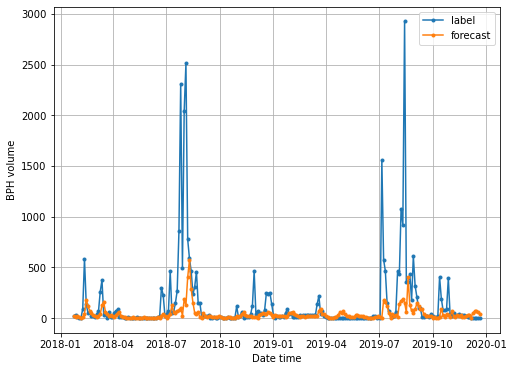

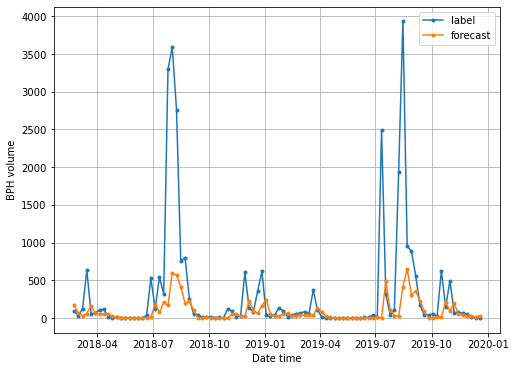

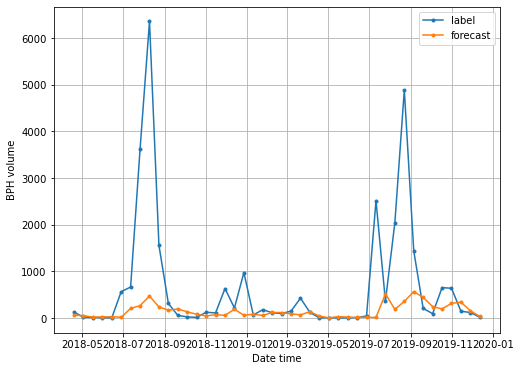

In [6]:
#########################################-- Dashboard prediction--#########################################

#################-- DataFrame station --#################
output_df_st_predict = widgets.Output()
def dropdown_station_predict_eventhandler(change):
    output_df_st_predict.clear_output()
    with output_df_st_predict:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- select predict --#################
def dropdown_start_date_eventhandler(change):
    return start_date
def dropdown_end_date_eventhandler(change):
    return end_date
def dropdown_file_eventhandler(change):
    dropdown_folder_list.options = get_list_folder()

#################-- load data predict  --#################
output_df_predict = widgets.Output()
output_description_data = widgets.Output()

def clicked_load_predict(b):   
    global frames_predict   
    output_df_predict.clear_output()
    output_description_data.clear_output()
    with output_description_data:
        li  = get_file_model(dropdown_folder_list.value)
        line_0_model_name = (li[0].split(":"))[1]
        print(line_0_model_name)
        line_4_drop = (li[5].split(":"))[1]
        print(line_4_drop)
        line_5_sampling = (li[6].split(":"))[1]
        print(line_5_sampling)
        line_6_time_lag = (li[7].split(":"))[1]
        print(line_6_time_lag)
        line_7_time_forecast = (li[8].split(":"))[1]
        print(line_7_time_forecast)
        date_start = str(start_date.value)
        date_stop = str(end_date.value)
        print(date_start)
        print(date_stop)
    with output_df_predict:
        df_out_predict = creat_dataset(dropdown_name_st_predict.value,str(start_date.value)[0:4],str(end_date.value)[0:4],line_5_sampling)
        frames_predict = drop_col(df_out_predict,list(line_4_drop.split(" "))).loc[date_start:date_stop] 
        display(frames_predict.head())
    

#################-- load_model  --#################
output_load_model = widgets.Output()
def clicked_load_model(b):
    output_load_model.clear_output()
    global model_loaded
       
    with output_load_model:
        Export_folder_name = "/Export_lstm/model/"
        model_name = cwd + Export_folder_name+dropdown_folder_list.value+"/model_lstm/"
        print(model_name)
        # Load model
        model_loaded = tf.keras.models.load_model(model_name)
        model_loaded.summary()

#################-- forecast_model  --#################
output_forecast_model = widgets.Output()
def clicked_predict_model(b):
    output_forecast_model.clear_output()
    with output_forecast_model:        
        li  = get_file_model(dropdown_folder_list.value)
        line_6_time_lag = (li[7].split(":"))[1]
        line_7_time_forecast = (li[8].split(":"))[1]

        n_day = int(line_6_time_lag)
        n_out = int(line_7_time_forecast)

        forecast_model(frames_predict,n_day,n_out)

start_date = widgets.DatePicker(description='Start Date',disabled=False)
end_date = widgets.DatePicker(description='End Date',disabled=False)
dropdown_folder_list = widgets.Dropdown(options = get_list_folder())
dropdown_name_st_predict = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_st.nameEng),description='station :')
button_load_model = widgets.Button(description='load model',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_load_data = widgets.Button(description='load data',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_predict = widgets.Button(description='Prediction',disabled=False,button_style='success',tooltip='Click me',icon='check')

button_load_model.on_click(clicked_load_model)
button_load_data.on_click(clicked_load_predict)
button_predict.on_click(clicked_predict_model)

dropdown_name_st_predict.observe(dropdown_station_predict_eventhandler, names='value')
start_date.observe(dropdown_start_date_eventhandler, names='values')
end_date.observe(dropdown_end_date_eventhandler, names='values')
dropdown_folder_list.observe(dropdown_file_eventhandler)



input_widgets_predict_row1 = widgets.HBox([dropdown_name_st_predict, start_date, end_date,button_load_data])
input_widgets_predict_row2 = widgets.HBox([dropdown_folder_list,button_load_model,button_predict])

dashboard_predict = widgets.VBox([input_widgets_predict_row1,input_widgets_predict_row2])
tab_predict = widgets.Tab([output_df_st_predict,output_load_model,output_description_data,output_df_predict,output_forecast_model])
tab_predict.set_title(0,'Dataset station')
tab_predict.set_title(1,'Load Model')
tab_predict.set_title(2,'description data')
tab_predict.set_title(3,'Dataset_predict')
tab_predict.set_title(4,'forecast')
display(dashboard_predict)
display(tab_predict)